Data Set – **winequality-red**

In class Assignment Expectations/Steps -

- Apply Data Cleaning to the Datasets and then apply Kmeans algorithm for find pattern and the best value of the K for the following features:

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
wine = pd.read_csv('winequality-red.csv')
df = wine.copy()
df = df.sample(frac=1,random_state=4).reset_index(drop=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,5
1,6.6,0.57,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5,5
2,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,7
3,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
4,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

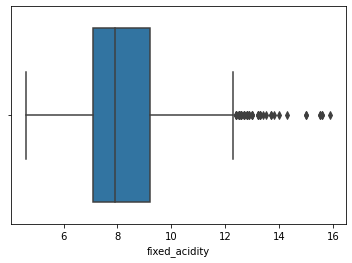

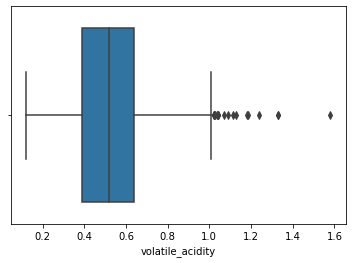

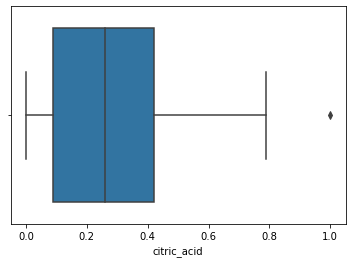

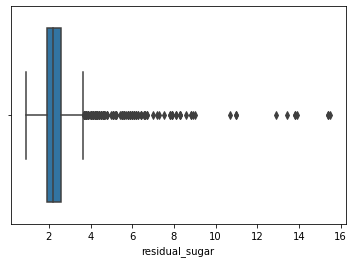

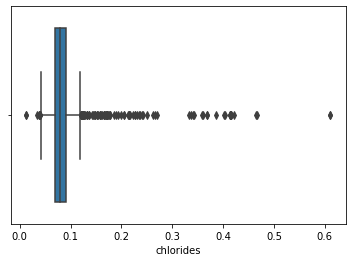

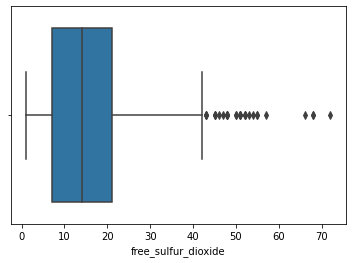

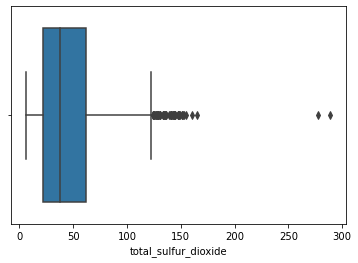

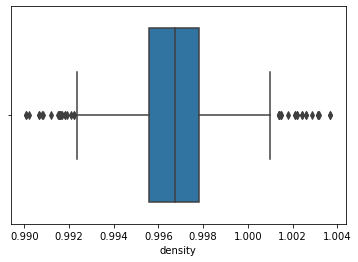

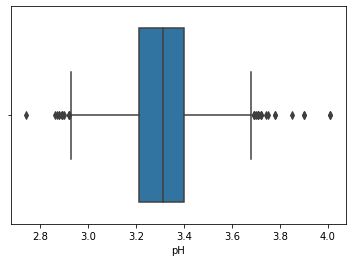

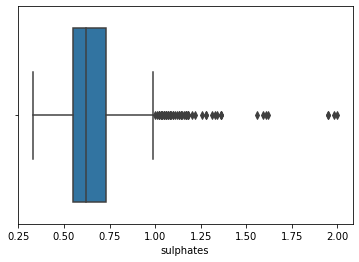

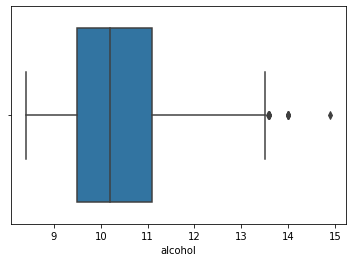

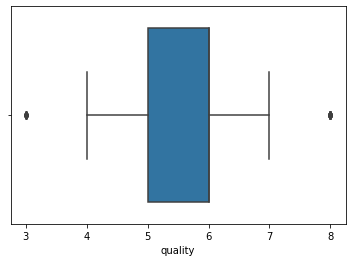

In [5]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [6]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

df = df[~(df>(q3+1.5*iqr))]

In [7]:
df = df.fillna(method='ffill')

In [8]:
df.shape

(1599, 12)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [10]:
dfs = ss.fit_transform(df)
dfs = pd.DataFrame(dfs,columns=df.columns)

In [11]:
dfs.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,2.280620,-0.608389,1.338553,2.501033,1.755477,1.925244,2.035330,2.452992,-0.727809,2.607684,-1.167787,-0.783086
1,-1.033909,0.294175,-1.291562,-0.180787,2.413488,-0.993142,-0.990217,-0.071025,0.511193,0.448601,-0.873664,-0.783086


## 1. Fixed Acidity and Volatile Acidity

In [12]:
cls = dfs.loc[:,['fixed_acidity','volatile_acidity']]

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
ssd = []
sscore = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  sscore.append(silhouette_score(cls,labels))

**SSD:**

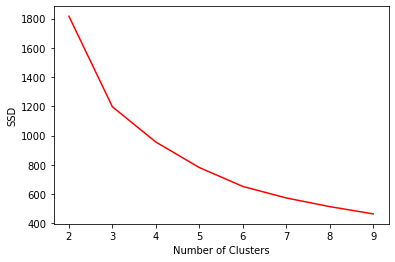

In [15]:
plt.plot(range(2,10),ssd,'r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

**Silhouette Score:**

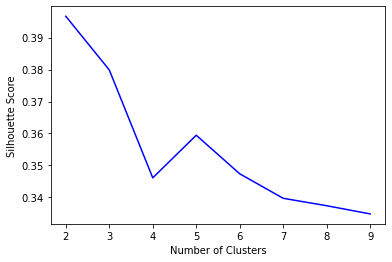

In [16]:
plt.plot(range(2,10),sscore,'b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Silhouette Coefficients Visualization:**

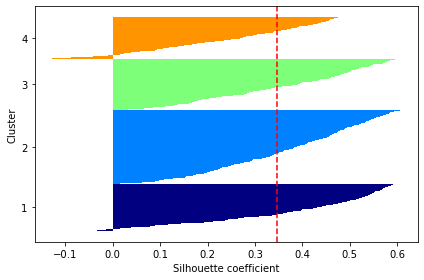

In [17]:
import plusmodules as pm
pm.svisualizer(cls,4)

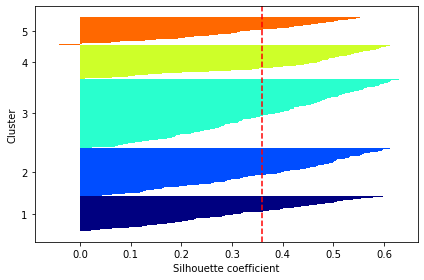

In [18]:
pm.svisualizer(cls,5)

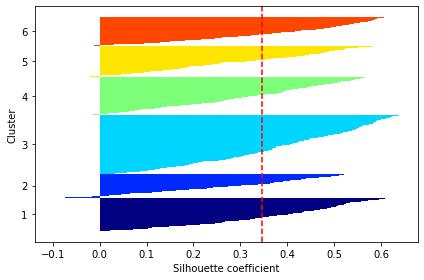

In [19]:
pm.svisualizer(cls,6)

**Conclusions:**
- Elbow Analysis shows possible elbows (not very distinct) at clusters 4, 5 and 6.
- Silhouette score plot showed higher value for 5-cluster solution while comparing 4, 5 and 6 number of clusters.

**Hence, we will choose 5-cluster solution as best.**

- We also checked distribution of Silhouette Coefficients. 
- These Distributions qualified all the requirements for 4, 5 and 6 cluster solutions. Hence, this didn't play any role in our decision.

## 2. Cirtic Acidity and Fixed Acidity

In [20]:
cls = dfs.loc[:,['citric_acid','fixed_acidity']]

In [21]:
ssd = []
sscore = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  sscore.append(silhouette_score(cls,labels))

**SSD:**

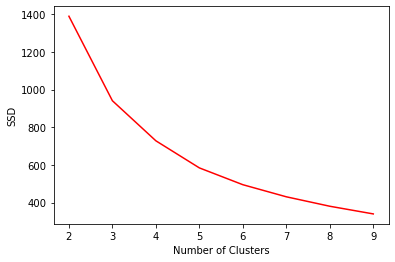

In [22]:
plt.plot(range(2,10),ssd,'r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

**Silhouette Score:**

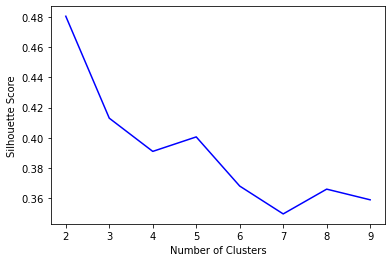

In [23]:
plt.plot(range(2,10),sscore,'b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Silhouette Coefficients Visualization:**

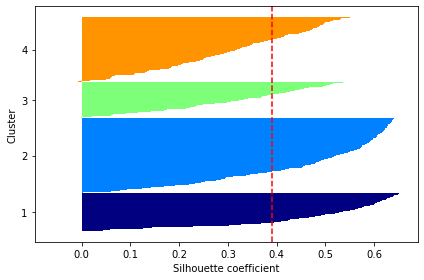

In [24]:
import plusmodules as pm
pm.svisualizer(cls,4)

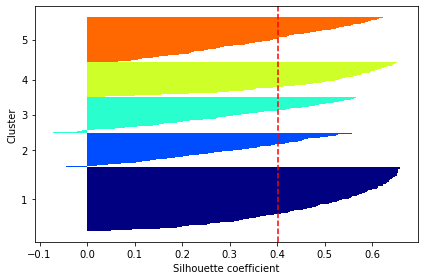

In [25]:
pm.svisualizer(cls,5)

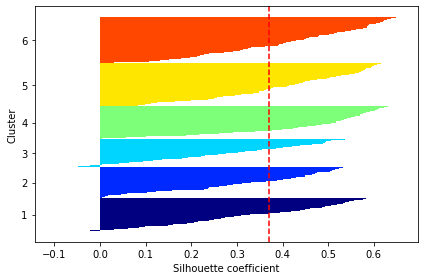

In [26]:
pm.svisualizer(cls,6)

**Conclusions:**
- Elbow Analysis shows possible elbows (not very distinct) at clusters 4, 5 and 6.
- Silhouette score plot showed higher value for 5-cluster solution while comparing 4, 5 and 6 number of clusters.

**Hence, we will choose 5-cluster solution as best.**

- We also checked distribution of Silhouette Coefficients. 
- These Distributions qualified all the requirements for 4, 5 and 6 cluster solutions. Hence, this didn't play any role in our decision.

## 3. Residual Sugar and Sulphades

In [27]:
cls = dfs.loc[:,['residual_sugar','sulphates']]

In [28]:
ssd = []
sscore = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  sscore.append(silhouette_score(cls,labels))

**SSD:**

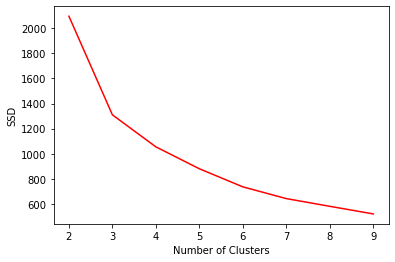

In [29]:
plt.plot(range(2,10),ssd,'r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

**Silhouette Score:**

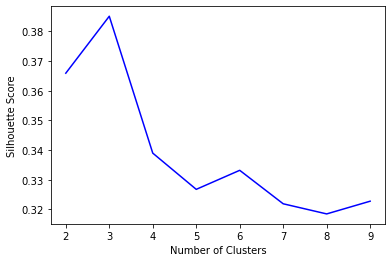

In [30]:
plt.plot(range(2,10),sscore,'b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Silhouette Coefficients Visualization:**

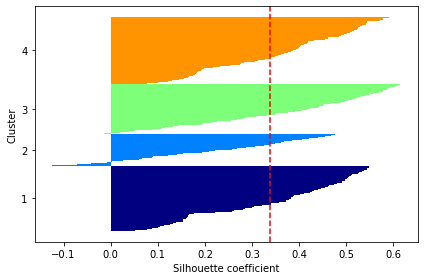

In [31]:
import plusmodules as pm
pm.svisualizer(cls,4)

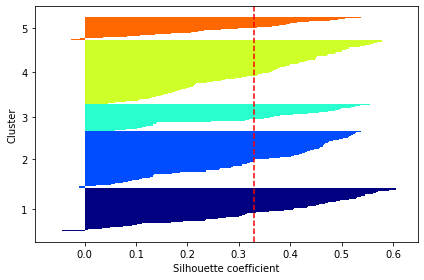

In [32]:
pm.svisualizer(cls,5)

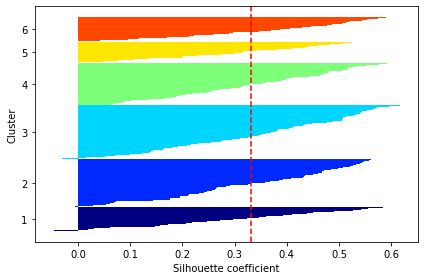

In [33]:
pm.svisualizer(cls,6)

**Conclusions:**
- Elbow Analysis shows possible elbows (not very distinct) at clusters 4, 5 and 6.
- Silhouette score plot showed higher value for 6-cluster solution while comparing 4, 5 and 6 number of clusters.

**Hence, we will choose 6-cluster solution as best.**

- We also checked distribution of Silhouette Coefficients. 
- These Distributions qualified all the requirements for 4, 5 and 6 cluster solutions. Hence, this didn't play any role in our decision.

## 4. Free Sulfur Di-oxide and Total Sulfur Di-oxide

In [34]:
cls = dfs.loc[:,['free_sulfur_dioxide','total_sulfur_dioxide']]

In [35]:
ssd = []
sscore = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  sscore.append(silhouette_score(cls,labels))

**SSD:**

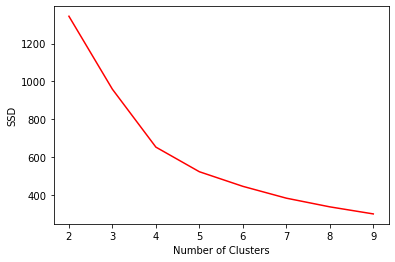

In [36]:
plt.plot(range(2,10),ssd,'r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

**Silhouette Score:**

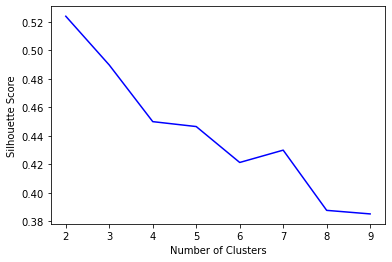

In [37]:
plt.plot(range(2,10),sscore,'b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Silhouette Coefficients Visualization:**

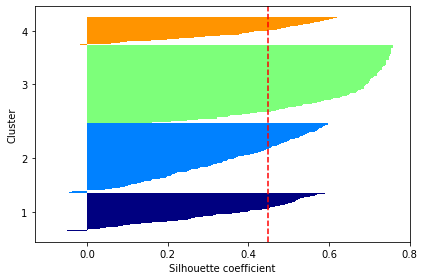

In [38]:
import plusmodules as pm
pm.svisualizer(cls,4)

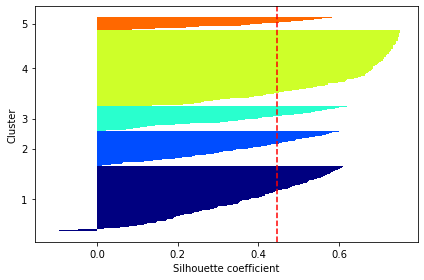

In [39]:
pm.svisualizer(cls,5)

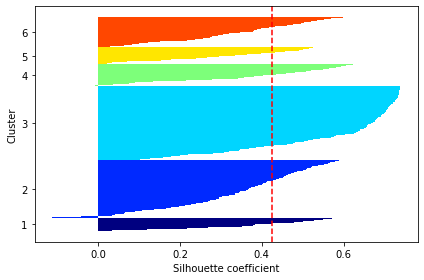

In [40]:
pm.svisualizer(cls,6)

**Conclusions:**
- Elbow Analysis shows possible elbows (not very distinct) at clusters 4, 5 and 6.
- Silhouette score plot showed higher value for 4-cluster solution while comparing 4, 5 and 6 number of clusters.

**Hence, we will choose 4-cluster solution as best.**

- We also checked distribution of Silhouette Coefficients. 
- These Distributions qualified all the requirements for 4, 5 and 6 cluster solutions. Hence, this didn't play any role in our decision.

## 5. Fixed Acidity, Citric Acidity and Volatile Acidity

In [41]:
cls = dfs.loc[:,['fixed_acidity','citric_acid','volatile_acidity']]

In [42]:
ssd = []
sscore = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  sscore.append(silhouette_score(cls,labels))

**SSD:**

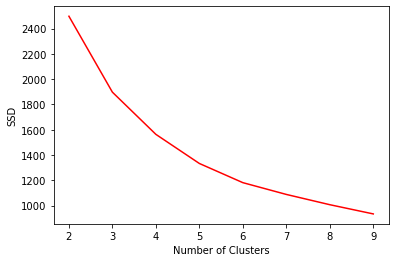

In [43]:
plt.plot(range(2,10),ssd,'r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

**Silhouette Score:**

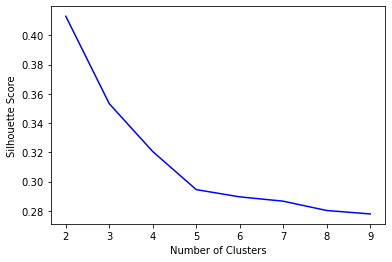

In [44]:
plt.plot(range(2,10),sscore,'b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Silhouette Coefficients Visualization:**

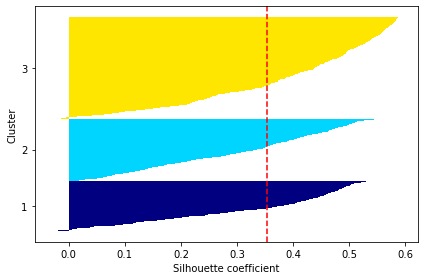

In [45]:
import plusmodules as pm
pm.svisualizer(cls,3)

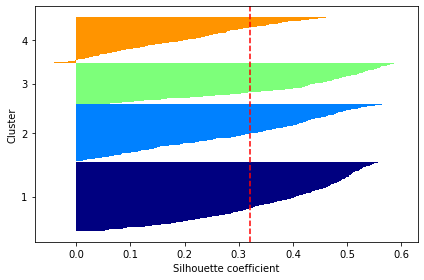

In [46]:
pm.svisualizer(cls,4)

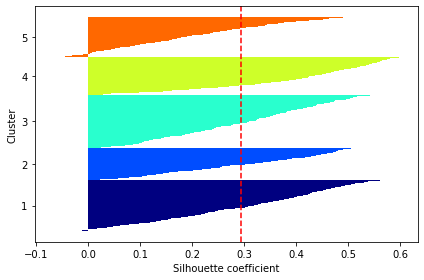

In [47]:
pm.svisualizer(cls,5)

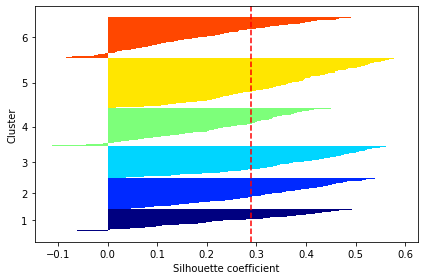

In [48]:
pm.svisualizer(cls,6)

**Conclusions:**
- Elbow Analysis shows possible elbows (not very distinct) at clusters 3, 4, 5 and 6.
- Silhouette score plot showed close values for all 3, 4, 5 and 6 number of clusters.
- We also checked distribution of Silhouette Coefficients. 
- These Distributions qualified all the requirements for 3 cluster solution. Hence, this didn't play any role in our decision.

**Hence, we will choose 3-cluster solution as best.**


## 6. Density and pH

In [49]:
cls = dfs.loc[:,['density','pH']]

In [50]:
ssd = []
sscore = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  sscore.append(silhouette_score(cls,labels))

**SSD:**

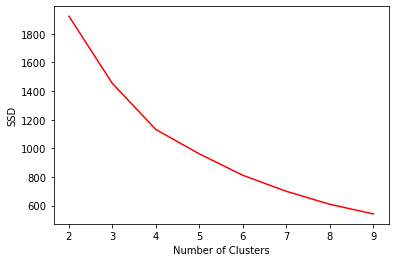

In [51]:
plt.plot(range(2,10),ssd,'r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

**Silhouette Score:**

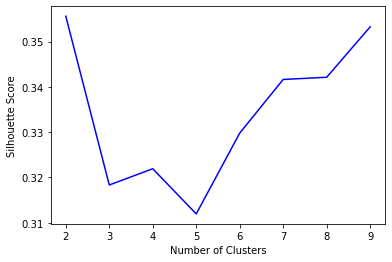

In [52]:
plt.plot(range(2,10),sscore,'b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Silhouette Coefficients Visualization:**

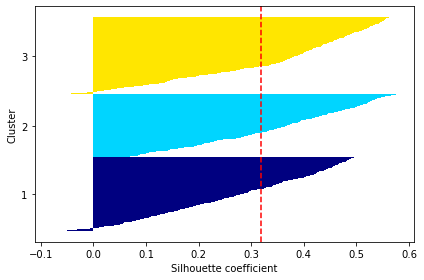

In [53]:
import plusmodules as pm
pm.svisualizer(cls,3)

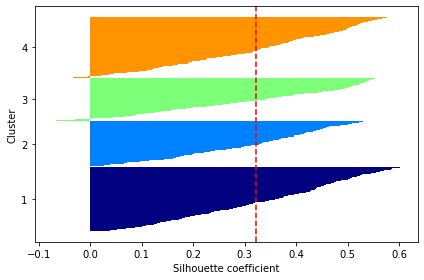

In [54]:
pm.svisualizer(cls,4)

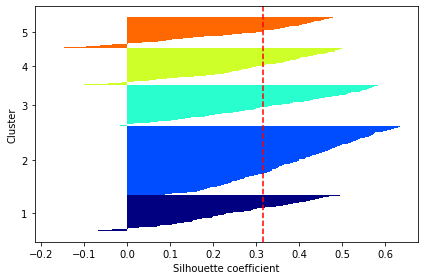

In [55]:
pm.svisualizer(cls,5)

**Conclusions:**
- Elbow Analysis shows possible elbows (not very distinct) at clusters 3, 4 and 5.
- Silhouette score plot showed higher value for 4-cluster solution while comparing 3, 4 and 5 number of clusters.

**Hence, we will choose 4-cluster solution as best.**

- We also checked distribution of Silhouette Coefficients. 
- These Distributions qualified all the requirements for 4, 5 and 6 cluster solutions. Hence, this didn't play any role in our decision.